                                                        NLP ASSIGNMENT - 1


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yatha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yatha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
ham     4825
spam     747
Name: label, dtype: int64


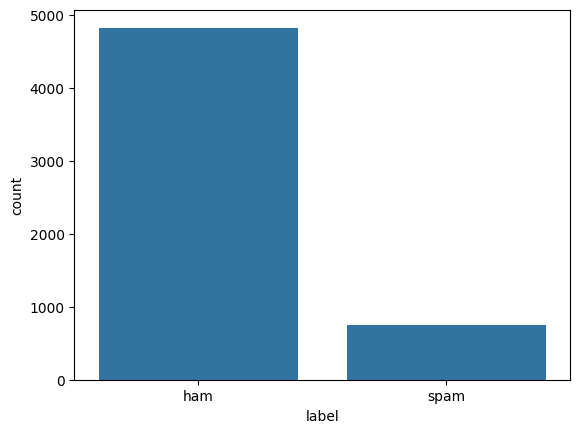

In [1]:
!pip install wordcloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
import re

nltk.download('stopwords')
nltk.download('punkt')

# Load dataset
df = pd.read_csv("spam.csv", encoding='latin-1')

# Inspect the first few rows
print(df.head())

# Some versions of this dataset have extra unnamed columns
df = df[['v1', 'v2']]
df.columns = ['label', 'text']

# Check class distribution
print(df['label'].value_counts())
sns.countplot(x='label', data=df)
plt.show()

# Prepare stopwords
stop_words = set(stopwords.words('english'))

Function for EDA (Top Words, Bigrams, Trigrams)

In [4]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')  # new requirement in latest NLTK


def get_top_ngrams(corpus, n=None, ngram_range=1):
    tokens = []
    for text in corpus:
        words = [word.lower() for word in nltk.word_tokenize(text) if word.isalpha()]
        words = [word for word in words if word not in stop_words]
        if ngram_range == 1:
            tokens.extend(words)
        else:
            tokens.extend([' '.join(gram) for gram in ngrams(words, ngram_range)])
    return Counter(tokens).most_common(n)

# Separate ham and spam
ham_texts = df[df['label'] == 'ham']['text']
spam_texts = df[df['label'] == 'spam']['text']

# Top 10 words, bigrams, trigrams for HAM
print("HAM - Top 10 Words:", get_top_ngrams(ham_texts, 10, 1))
print("HAM - Top 10 Bigrams:", get_top_ngrams(ham_texts, 10, 2))
print("HAM - Top 10 Trigrams:", get_top_ngrams(ham_texts, 10, 3))

# Top 10 words, bigrams, trigrams for SPAM
print("SPAM - Top 10 Words:", get_top_ngrams(spam_texts, 10, 1))
print("SPAM - Top 10 Bigrams:", get_top_ngrams(spam_texts, 10, 2))
print("SPAM - Top 10 Trigrams:", get_top_ngrams(spam_texts, 10, 3))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yatha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Yatha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


HAM - Top 10 Words: [('u', 989), ('gt', 318), ('lt', 316), ('get', 301), ('ok', 261), ('go', 248), ('got', 242), ('ur', 237), ('know', 236), ('like', 231)]
HAM - Top 10 Bigrams: [('lt gt', 276), ('gon na', 58), ('call later', 50), ('let know', 39), ('sorry call', 38), ('r u', 37), ('u r', 35), ('good morning', 31), ('take care', 31), ('u wan', 29)]
HAM - Top 10 Trigrams: [('sorry call later', 38), ('lt decimal gt', 23), ('gt lt gt', 18), ('happy new year', 18), ('lt gt lt', 16), ('like lt gt', 14), ('pls send message', 13), ('cant pick phone', 12), ('pick phone right', 12), ('phone right pls', 12)]
SPAM - Top 10 Words: [('call', 346), ('free', 219), ('txt', 156), ('u', 144), ('ur', 144), ('mobile', 123), ('text', 121), ('stop', 114), ('claim', 113), ('reply', 104)]
SPAM - Top 10 Bigrams: [('please call', 45), ('po box', 24), ('guaranteed call', 23), ('prize guaranteed', 22), ('call landline', 22), ('selected receive', 19), ('contact u', 19), ('send stop', 19), ('every week', 19), ('awa

WordClouds for Each Class

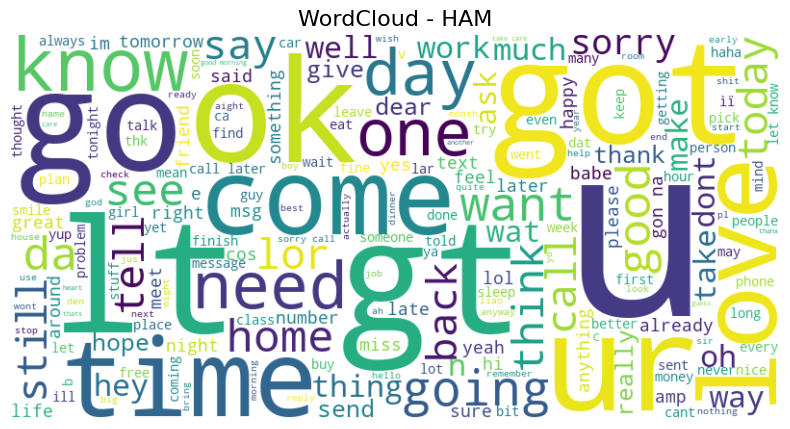

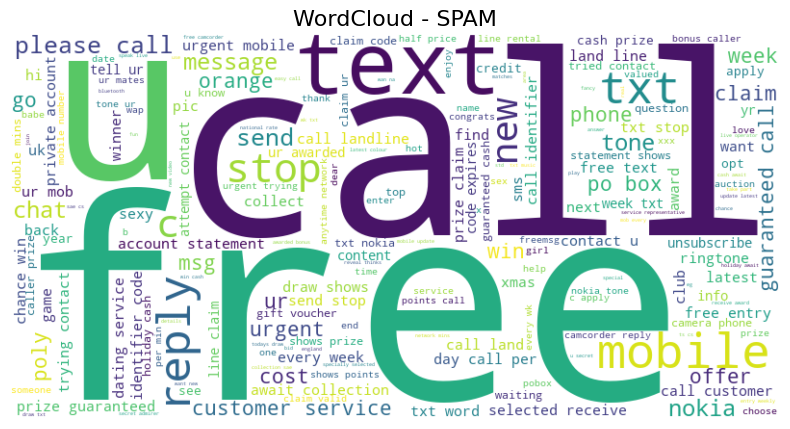

In [5]:
def plot_wordcloud(corpus, title):
    text = " ".join(corpus)
    words = [word.lower() for word in nltk.word_tokenize(text) if word.isalpha()]
    words = [word for word in words if word not in stop_words]
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(words))
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

plot_wordcloud(ham_texts, "WordCloud - HAM")
plot_wordcloud(spam_texts, "WordCloud - SPAM")

Bag-of-Words Model

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

# Bag-of-Words vectorization
bow_vectorizer = CountVectorizer(stop_words='english')
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

# Logistic Regression model
model_bow = LogisticRegression(max_iter=1000)
model_bow.fit(X_train_bow, y_train)

# Predictions & F1-score
y_pred_bow = model_bow.predict(X_test_bow)
f1_bow = f1_score(y_test, y_pred_bow, pos_label='spam')

print("=== Bag-of-Words Logistic Regression ===")
print(classification_report(y_test, y_pred_bow))
print("F1-score (spam class):", f1_bow)


=== Bag-of-Words Logistic Regression ===
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       966
        spam       1.00      0.83      0.90       149

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115

F1-score (spam class): 0.9044117647058824


TF-IDF + Logistic Regression

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Logistic Regression model
model_tfidf = LogisticRegression(max_iter=1000)
model_tfidf.fit(X_train_tfidf, y_train)

# Predictions & F1-score
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)
f1_tfidf = f1_score(y_test, y_pred_tfidf, pos_label='spam')

print("=== TF-IDF Logistic Regression ===")
print(classification_report(y_test, y_pred_tfidf))
print("F1-score (spam class):", f1_tfidf)


=== TF-IDF Logistic Regression ===
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       966
        spam       1.00      0.76      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115

F1-score (spam class): 0.8625954198473283


Text Preprocessing + TF-IDF + Logistic Regression

In [8]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove emails
    text = re.sub(r'\S+@\S+', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords & lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word.isalpha()]
    return " ".join(tokens)

# Apply preprocessing
df['clean_text'] = df['text'].apply(preprocess_text)

# Train-test split again with cleaned text
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    df['clean_text'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

# TF-IDF on cleaned text
tfidf_vectorizer_clean = TfidfVectorizer()
X_train_tfidf_clean = tfidf_vectorizer_clean.fit_transform(X_train_clean)
X_test_tfidf_clean = tfidf_vectorizer_clean.transform(X_test_clean)

# Logistic Regression model
model_tfidf_clean = LogisticRegression(max_iter=1000)
model_tfidf_clean.fit(X_train_tfidf_clean, y_train_clean)

# Predictions & F1-score
y_pred_tfidf_clean = model_tfidf_clean.predict(X_test_tfidf_clean)
f1_tfidf_clean = f1_score(y_test_clean, y_pred_tfidf_clean, pos_label='spam')

print("=== TF-IDF with Preprocessing Logistic Regression ===")
print(classification_report(y_test_clean, y_pred_tfidf_clean))
print("F1-score (spam class):", f1_tfidf_clean)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Yatha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


=== TF-IDF with Preprocessing Logistic Regression ===
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       966
        spam       0.99      0.74      0.85       149

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.96      0.96      1115

F1-score (spam class): 0.8461538461538461


Score Comparison

In [9]:
# Final results table
results = pd.DataFrame({
    'Method': ['Bag-of-Words', 'TF-IDF', 'TF-IDF + Preprocessing'],
    'F1-score (spam class)': [f1_bow, f1_tfidf, f1_tfidf_clean]
})

print(results)


                   Method  F1-score (spam class)
0            Bag-of-Words               0.904412
1                  TF-IDF               0.862595
2  TF-IDF + Preprocessing               0.846154


Score Comparison Plot

C:\Users\Yatha\AppData\Local\Temp\ipykernel_22176\2473217641.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


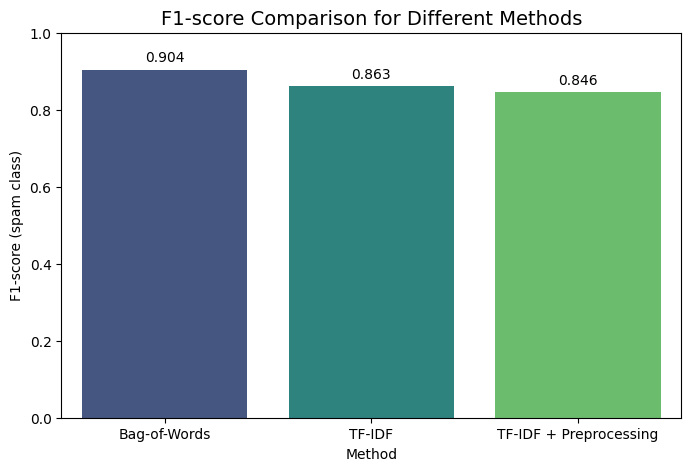

In [10]:
# Bar plot for score comparison
plt.figure(figsize=(8,5))
sns.barplot(
    x='Method',
    y='F1-score (spam class)',
    data=results,
    palette='viridis'
)
plt.title('F1-score Comparison for Different Methods', fontsize=14)
plt.ylabel('F1-score (spam class)')
plt.ylim(0, 1)
for i, val in enumerate(results['F1-score (spam class)']):
    plt.text(i, val + 0.02, f"{val:.3f}", ha='center', fontsize=10)
plt.show()
